## Load Data

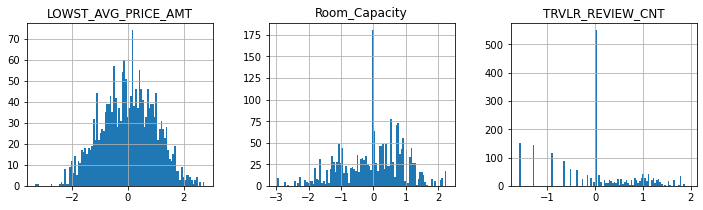

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
from gibbs_sampler import *


data = pd.read_pickle("/user/hl3541/RL_Expedia/Expedia/Search_Trans/search_trans_selected.pkl")
np.random.seed(42)
data = data[["LOWST_AVG_PRICE_AMT","Room_Capacity", "TRVLR_REVIEW_CNT"]].sample(2000)
_ = data.hist(bins=100, figsize=(12, 3), layout=(1, 3))

## Gibbs Sampler

100%|██████████| 50/50 [00:01<00:00, 25.27it/s]


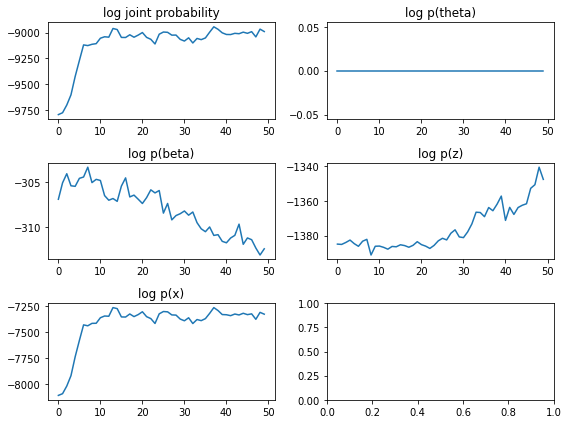

In [3]:
K = 2
gibbs = GaussianGibbsSampler(data.values, K)
res = gibbs.sampling(n_epochs=50)

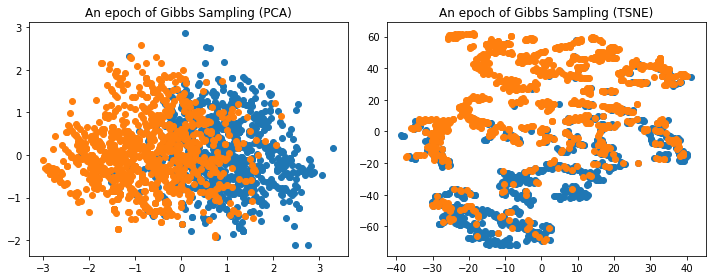

In [169]:
arr_pca = PCA(2).fit_transform(data.values)
arr_tsne = TSNE(2).fit_transform(data.values)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for k in range(K):
    axes[0].plot(arr_pca[:,0][res['z']==k],arr_pca[:,1][res['z']==k],'o',label=str(k))
    axes[1].plot(arr_tsne[:,0][res['z']==k], arr_tsne[:,1][res['z']==k],'o',label=str(k))
    axes[0].set_title("An epoch of Gibbs Sampling (PCA)")
    axes[1].set_title("An epoch of Gibbs Sampling (TSNE)")

plt.tight_layout()
plt.show()

## Synthetic Data with Two Distributions

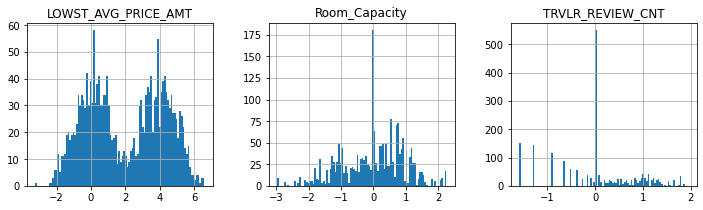

In [170]:
data = pd.read_pickle("/user/hl3541/RL_Expedia/Expedia/Search_Trans/search_trans_selected.pkl")
np.random.seed(42)
data = data[["LOWST_AVG_PRICE_AMT","Room_Capacity", "TRVLR_REVIEW_CNT"]].sample(2000)
data.iloc[:1000,0] += 4
_ = data.hist(bins=100, figsize=(12, 3), layout=(1, 3))

100%|██████████| 50/50 [00:01<00:00, 25.25it/s]


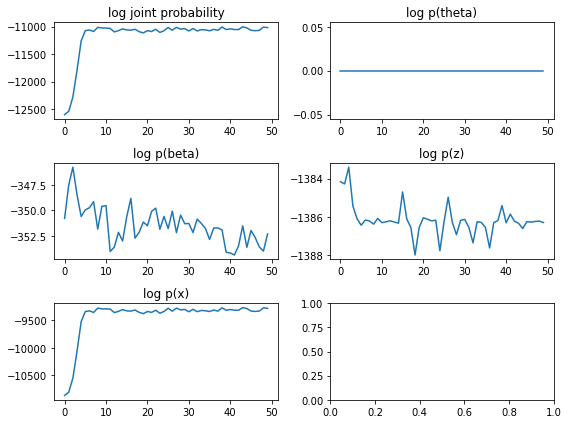

In [172]:
K=2
gibbs = GaussianGibbsSampler(data.values, K)
res = gibbs.sampling(n_epochs=50)

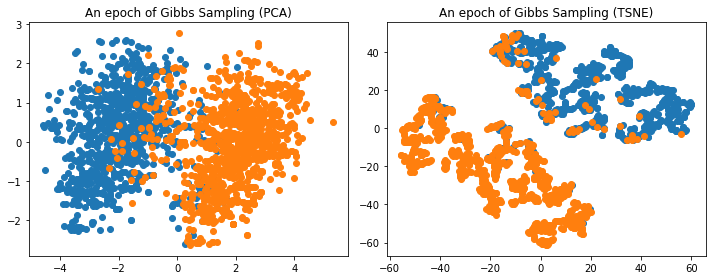

In [173]:
arr_pca = PCA(2).fit_transform(data.values)
arr_tsne = TSNE(2).fit_transform(data.values)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for k in range(K):
    axes[0].plot(arr_pca[:,0][res['z']==k],arr_pca[:,1][res['z']==k],'o',label=str(k))
    axes[1].plot(arr_tsne[:,0][res['z']==k], arr_tsne[:,1][res['z']==k],'o',label=str(k))
    axes[0].set_title("An epoch of Gibbs Sampling (PCA)")
    axes[1].set_title("An epoch of Gibbs Sampling (TSNE)")

plt.tight_layout()
plt.show()